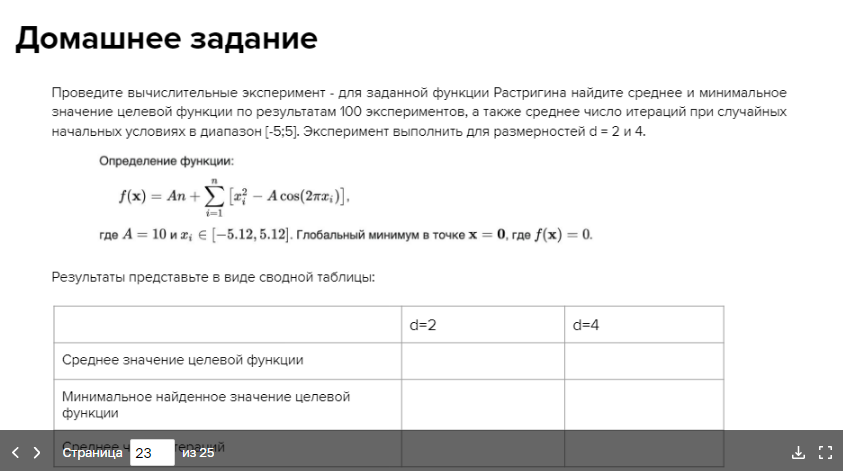

In [8]:
import numpy as np

def rastrigin(x, A=10):
    fx=A*len(x)
    for xi in x:
        fx += xi**2-A*np.cos(2*np.pi*xi)
    return fx


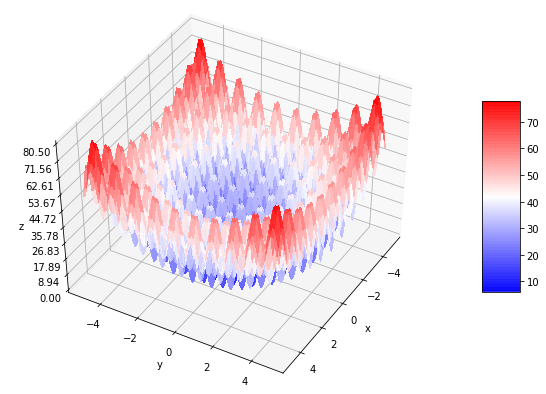

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10,7])

ax = fig.gca(projection = "3d")
ax.view_init(45, 30)

# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

Z = rastrigin(np.array([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='bwr',
                       linewidth=10, antialiased=False, alpha=0.8)

ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [10]:
from scipy.optimize import minimize
import pandas as pd

In [11]:
indx=['Среднее кол-во итераций',
    'Минимальное значение целевой функции (вычисленное)',
    'Среднее значение целевой функции (вычисленное)']

In [12]:
d = 2 #размерность вектора
value_func = []
nit_func = []
for i in range(100):
    x0 = np.random.uniform(-5, 5, d)
    res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':False})
    value_func.append(rastrigin(res.x))
    nit_func.append(res.nit)

df_d2 = pd.DataFrame({'d=2':[np.mean(nit_func), np.min(value_func), np.mean(value_func)]}, index=indx)

In [13]:
d = 4 #размерность вектора
value_func = []
nit_func = []
for i in range(100):
    x0 = np.random.uniform(-5, 5, d)
    res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':False})
    value_func.append(rastrigin(res.x))
    nit_func.append(res.nit)

df_d4 = pd.DataFrame({'d=4':[np.mean(nit_func), np.min(value_func), np.mean(value_func)]}, index=indx)

In [14]:
np.round(pd.concat([df_d2, df_d4], axis=1,), 4)

,d=2,d=4
Среднее кол-во итераций,62.5000,186.1800
Минимальное значение целевой функции (вычисленное),0.0000,2.9849
Среднее значение целевой функции (вычисленное),17.7898,35.3208
